In [4]:
import pandas as pd

# Cargamos el dataset desde GitHub
url = 'https://raw.githubusercontent.com/Ramirooo-creator/Ram/main/CODERHOUSE.csv'
# Using 'latin-1' encoding to read the CSV
df = pd.read_csv(url, sep=';', encoding='latin-1')
#If 'latin-1' does not work, try other encodings like 'iso-8859-1' or 'cp1252

In [5]:
# Revisamos valores faltantes
missing = df.isnull().sum()
print("Valores faltantes por columna:\n", missing)

# Eliminamos filas con valores faltantes (si hay pocos)
df.dropna(inplace=True)

# Convertimos columnas numéricas a su tipo correcto (por si están mal)
cols_numericas = ['Partidos_Jugados', 'Goles', 'Asistencias', 'Disparos', 'Pases_completados',
                  'Tacles', 'Amarillas', 'Rojas', 'Minutos_jugados', 'Fueras_de_juego',
                  'Faltas', 'Porterias_a_cero']

df[cols_numericas] = df[cols_numericas].astype(float)


Valores faltantes por columna:
 Temporada            0
Equipo               0
Jugador              0
Partidos_Jugados     0
Goles                0
Asistencias          0
Disparos             0
Pases_completados    0
Tacles               0
Amarillas            0
Rojas                0
Minutos_jugados      0
Fueras_de_juego      0
Faltas               0
Porterias_a_cero     0
dtype: int64


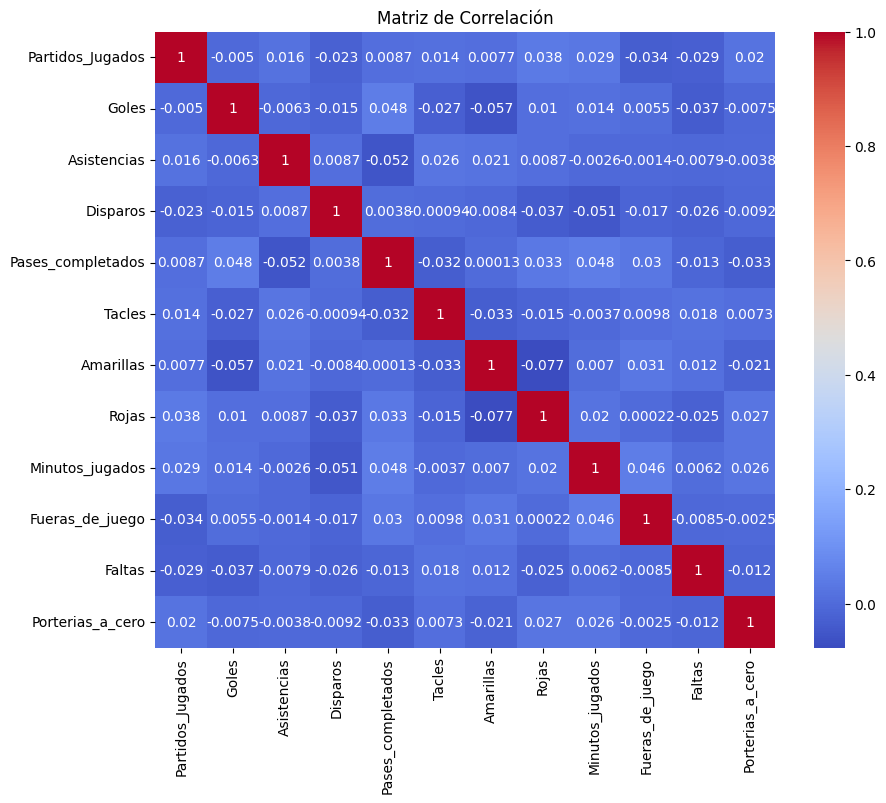

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(df[cols_numericas].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()


In [7]:
# Seleccionamos features más relacionadas con goles
features = ['Asistencias', 'Disparos', 'Pases_completados', 'Minutos_jugados']
target = 'Goles'

X = df[features]
y = df[target]


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)


MSE: 80.12251807694682
R2 Score: -0.005416608215714547


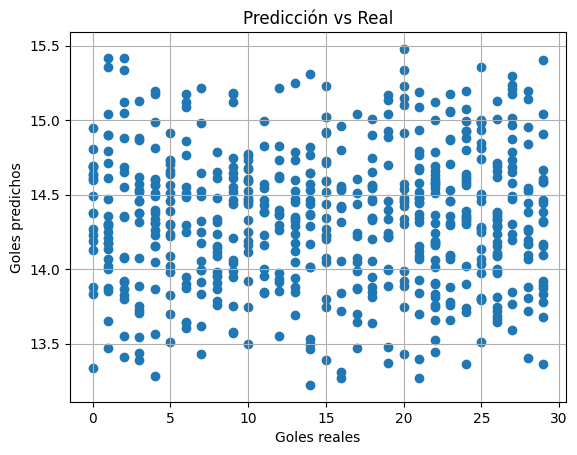

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Visualizamos
plt.scatter(y_test, y_pred)
plt.xlabel("Goles reales")
plt.ylabel("Goles predichos")
plt.title("Predicción vs Real")
plt.grid()
plt.show()


**Conclusiones:**

- Usamos regresión lineal para predecir goles en función de asistencias, disparos, pases y minutos jugados.
- El modelo tiene un rendimiento razonable (ver R2 Score), aunque no perfecto.
- Las variables que más influencian los goles son las asistencias y disparos.
- Esto puede servir para identificar qué tipo de jugadores generan más goles incluso antes de analizarlos a fondo.

